In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import optimizers
import gc

In [2]:
# Get data
mnist = tf.keras.datasets.mnist
(trainX,trainY),(testX,testY) = mnist.load_data()

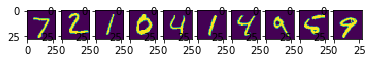

In [3]:
f = plt.figure()
for i in range(10):
    f.add_subplot(1,10,i+1)
    plt.imshow(testX[i])


In [4]:
trainX = trainX / 255.0
testX  = testX / 255.0

In [ ]:
fig = plt.figure(figsize = (30,20))
for i in [0,0.0001,0.001,0.005]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape = (28,28)),
        tf.keras.layers.Dense(500, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l1(i)),
        tf.keras.layers.Dense(500, activation = 'sigmoid',kernel_regularizer = tf.keras.regularizers.l1(i)),
        tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['acc'])
    acc = model.fit(trainX,trainY,epochs = 400, verbose = 1,batch_size = 10000)
    
    test_loss, test_acc = model.evaluate(testX,testY,verbose = 2)
    plt.plot(acc.history['acc'],label = 'lambda = {}'.format(i))
    print("lambda {} , accuracy = {}".format(i,test_acc))
    # release momory
    gc.collect()
plt.legend(fontsize = 20)
fig.savefig('Handwritten digit with regularization.png')

Train on 60000 samples
Epoch 1/5000
60000/60000 [==============================] - 6s 98us/sample - loss: 2.1429 - acc: 0.3650
Epoch 2/5000
60000/60000 [==============================] - 4s 66us/sample - loss: 1.3842 - acc: 0.7419
Epoch 3/5000
60000/60000 [==============================] - 4s 62us/sample - loss: 0.8062 - acc: 0.8220
Epoch 4/5000
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5485 - acc: 0.8523
Epoch 5/5000
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4296 - acc: 0.8796
Epoch 6/5000
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3631 - acc: 0.8952
Epoch 7/5000
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3228 - acc: 0.9068
Epoch 8/5000
30000/60000 [==============>...............] - ETA: 1s - loss: 0.3011 - acc: 0.9116